In [1]:
# Import libraries
import pandas as pd
import numpy as np
from numpy import mean, std

# Graph plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

# Modeling and evaluation
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from time import time

# Oversampling
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")

## Data Understanding

In [2]:
# Load the dataset
names = ['ID', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']
data = pd.read_csv('dataset/glass.data', names = names)

# Drop the ID feature as it will not be used
data.drop('ID', axis = 1, inplace = True)

data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
# Statistical understanding
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [4]:
data.shape

(214, 10)

In [5]:
# Check for datatype and missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


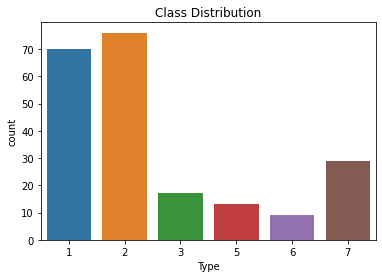

In [6]:
# Class distribution
sns.countplot(data['Type'])
plt.title("Class Distribution")
plt.show()

In [7]:
data['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [8]:
# Features
features = data.columns[:-1].tolist()
features

['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']

### Exploratory Data Analysis

#### Violin Plot (Lim Wenn Chuaan)

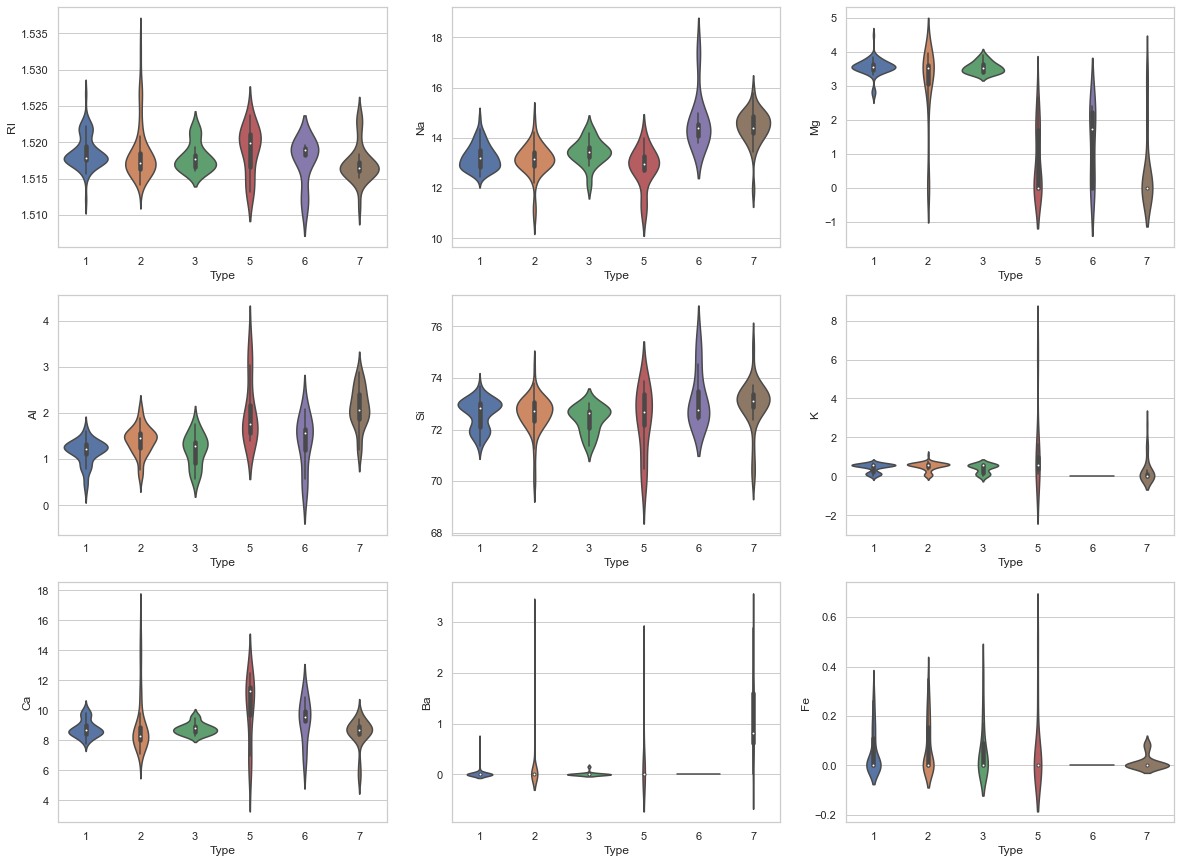

In [9]:
plt.figure(figsize = (20,15))
sns.set(style = 'whitegrid')

plt.subplot(3, 3, 1)
sns.violinplot(x='Type', y='RI', data=data, size=4)
plt.subplot(3, 3, 2)
sns.violinplot(x='Type', y='Na', data=data, size=4)
plt.subplot(3, 3, 3)
sns.violinplot(x='Type', y='Mg', data=data, size=4)
plt.subplot(3, 3, 4)
sns.violinplot(x='Type', y='Al', data=data, size=4)
plt.subplot(3, 3, 5)
sns.violinplot(x='Type', y='Si', data=data, size=4)
plt.subplot(3, 3, 6)
sns.violinplot(x='Type', y='K', data=data, size=4)
plt.subplot(3, 3, 7)
sns.violinplot(x='Type', y='Ca', data=data, size=4)
plt.subplot(3, 3, 8)
sns.violinplot(x='Type', y='Ba', data=data, size=4)
plt.subplot(3, 3, 9)
sns.violinplot(x='Type', y='Fe', data=data, size=4)

plt.show()

#### Heatmap (Ong Kar Ming)

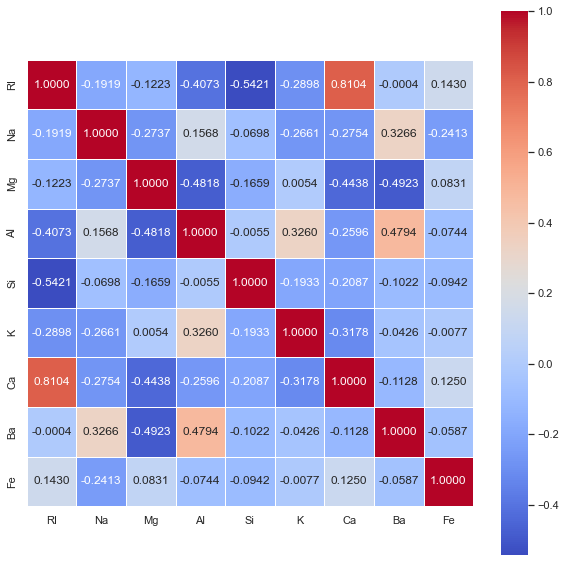

In [10]:
# Compute Correlations
corr = data[features].corr()

# Heatmap
plt.figure(figsize=(10,10))

sns.heatmap(corr,annot = True, fmt = '.4f', cmap = 'coolwarm', square = True, linewidths=.5)

# # Getting only the lower triangle
# corr_mask = np.triu(corr)
# sns.heatmap(corr,annot = True, fmt = '.4f', cmap = 'coolwarm', square = True, linewidths=.5, mask = corr_mask)

plt.show()

#### Scatterplot (Joyce Kueh Suk Ting)

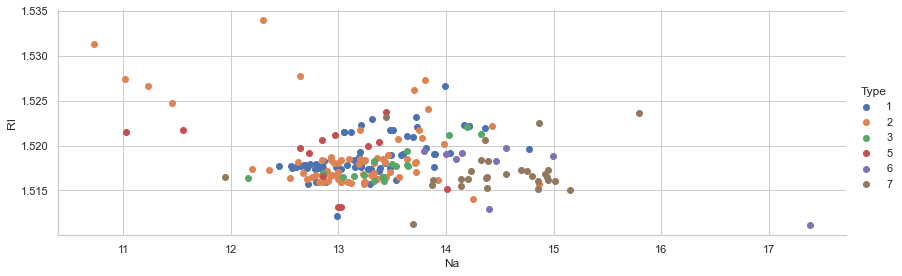

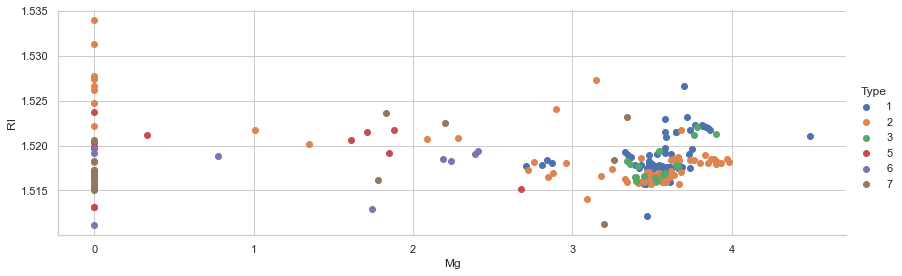

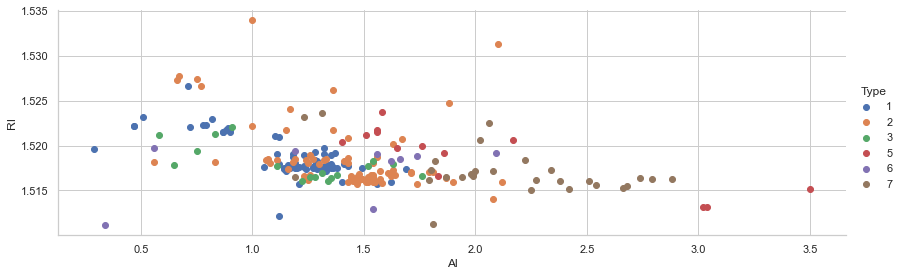

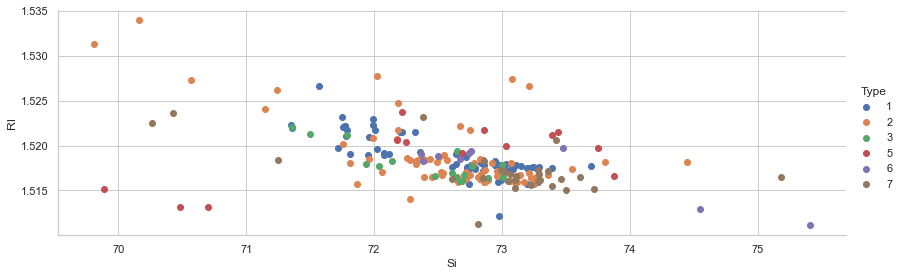

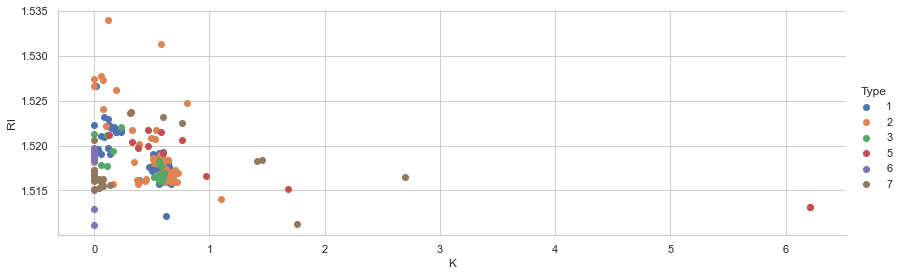

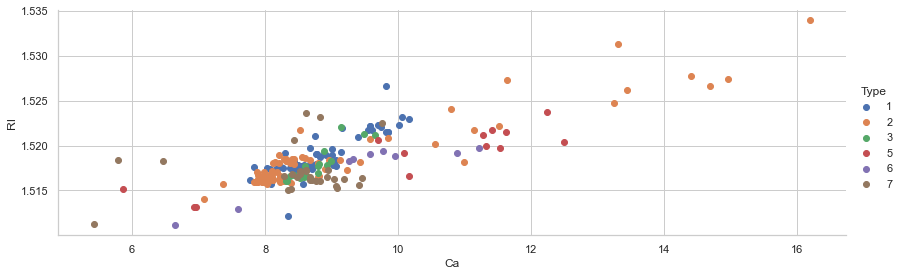

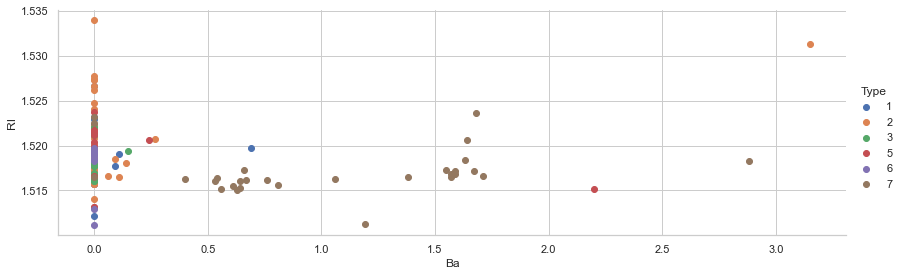

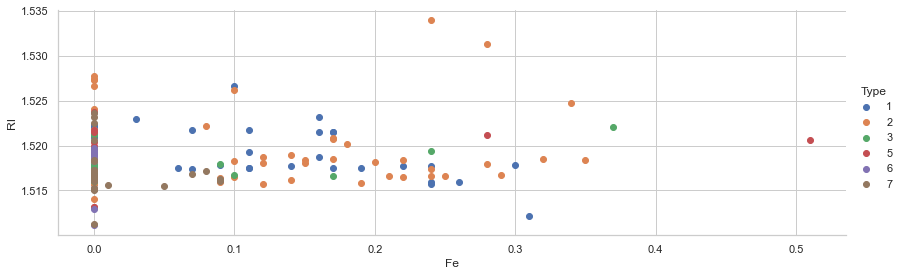

1 building_windows_float_processed
2 building_windows_non_float_processed
3 vehicle_windows_float_processed
4 vehicle_windows_non_float_processed (none in this database)
5 containers
6 tableware
7 headlamps


In [11]:
sns.FacetGrid(data, hue="Type", height=4,aspect=3).map(plt.scatter, "Na", "RI").add_legend() 
sns.FacetGrid(data, hue="Type", height=4,aspect=3).map(plt.scatter, "Mg", "RI").add_legend()
sns.FacetGrid(data, hue="Type", height=4,aspect=3).map(plt.scatter, "Al", "RI").add_legend()
sns.FacetGrid(data, hue="Type", height=4,aspect=3).map(plt.scatter, "Si", "RI").add_legend()
sns.FacetGrid(data, hue="Type", height=4,aspect=3).map(plt.scatter, "K", "RI").add_legend()
sns.FacetGrid(data, hue="Type", height=4,aspect=3).map(plt.scatter, "Ca", "RI").add_legend()
sns.FacetGrid(data, hue="Type", height=4,aspect=3).map(plt.scatter, "Ba", "RI").add_legend()
sns.FacetGrid(data, hue="Type", height=4,aspect=3).map(plt.scatter, "Fe", "RI").add_legend()
plt.show()
print("""1 building_windows_float_processed
2 building_windows_non_float_processed
3 vehicle_windows_float_processed
4 vehicle_windows_non_float_processed (none in this database)
5 containers
6 tableware
7 headlamps""")

#### Histogram with KDE (Ho Wan Gee)

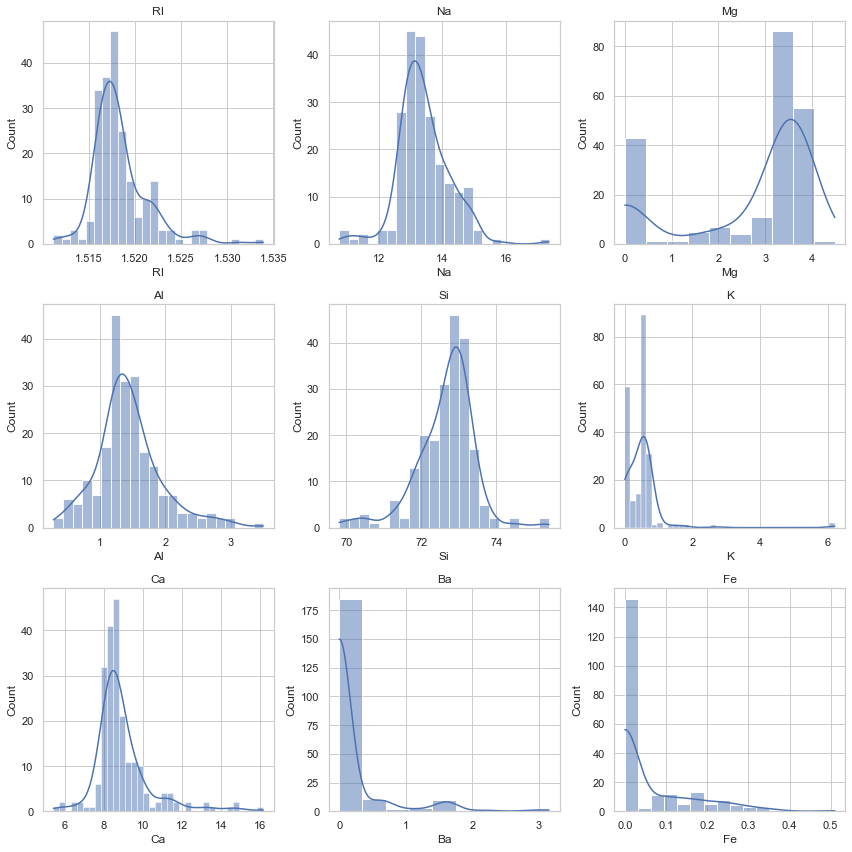

In [12]:
# KDE plot
fig, ax = plt.subplots(3,3, figsize = (12, 12))

k = 0
for i in range(0,3):
    for j in range(0,3):
        sns.histplot(data[features[k]], ax = ax[i, j], kde = True)
        ax[i, j].set_title(features[k])
        k+=1

plt.tight_layout()
plt.show()

## Data Preprocessing

#### Outlier Removal

In [13]:
# Define outlier function (Take the observation that has more than 2 outliers)

from collections import Counter

def outlier_indices(data):
    outlier_ind = []
    
    # iterate over features(columns)
    for col in data.columns.tolist():
        q1 = np.percentile(data[col], 25) # First quartile
        q3 = np.percentile(data[col], 75) # Third quartile
        iqr = q3 - q1 # Interquartile range
        outlier_step = 1.5 * iqr
        
        # Find a list of indices of outliers
        outlier_list = data[(data[col] < q1 - outlier_step) | (data[col] > q3 + outlier_step)].index
        
        # Append the found outlier indices to a list of outlier indices
        outlier_ind.extend(outlier_list)
        
    # Select observations containing more than 2 outliers
    outlier_ind = Counter(outlier_ind) # Count each row has how many outliers     
    multiple_outliers = list( k for k, v in outlier_ind.items() if v > 2 )
    
    return multiple_outliers

print('The dataset contains %d observations with more than 2 outliers' %(len(outlier_indices(data[features]))))

The dataset contains 14 observations with more than 2 outliers


In [14]:
# Remove outlier
outlier_indices = outlier_indices(data[features])
data_dropped = data.drop(outlier_indices).reset_index(drop=True)

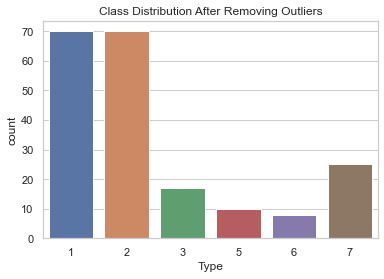

In [15]:
# New dataset after removing outliers
data = data_dropped

sns.countplot(data['Type'])
plt.title("Class Distribution After Removing Outliers")
plt.show()

In [16]:
data['Type'].value_counts()

1    70
2    70
7    25
3    17
5    10
6     8
Name: Type, dtype: int64

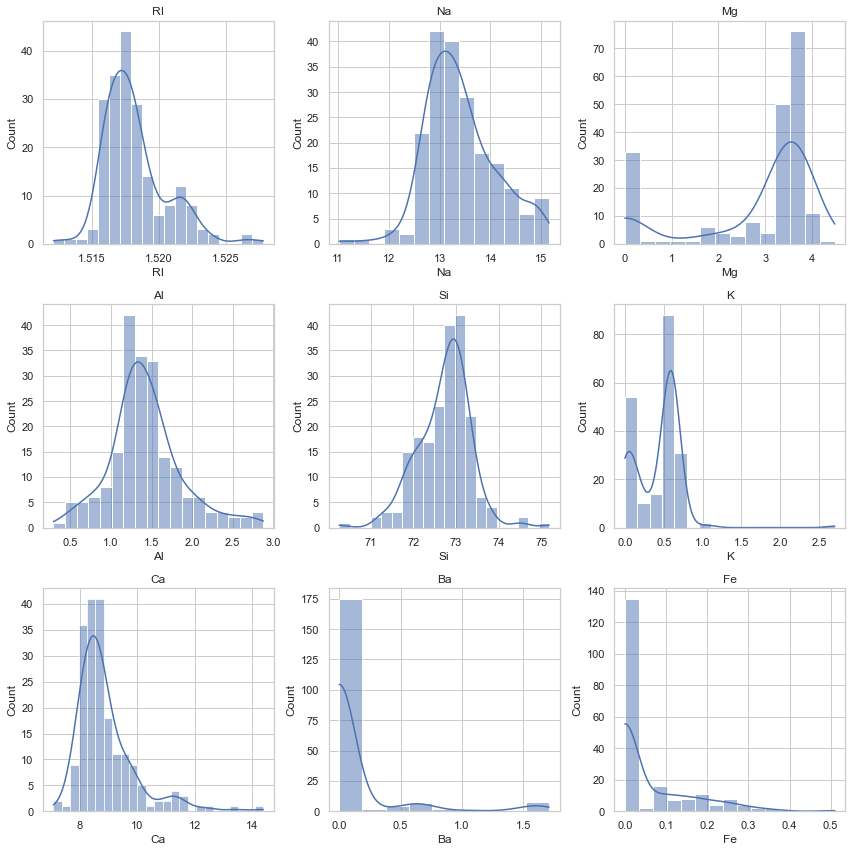

In [17]:
# Distribution after outlier removal

fig, ax = plt.subplots(3,3, figsize = (12, 12))

k = 0
for i in range(0,3):
    for j in range(0,3):
        sns.histplot(data[features[k]], ax = ax[i, j], kde = True)
        ax[i, j].set_title(features[k])
        k+=1

plt.tight_layout()
plt.show()

In [18]:
# Assign features into X and labels into y
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

#### Train Test Split

In [19]:
# Split data into 75% training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y, random_state = 42)

#### Feature Scaling

In [20]:
ss = StandardScaler()
mms = MinMaxScaler()

## Model performance measurement

In [21]:
def model_performance(title, y_test, y_pred):

    cfs_mat = confusion_matrix(y_test, y_pred, labels = y.unique())
    
    print(title,": \n")
    print(classification_report(y_test, y_pred))
    print('\n')
    print('Confusion matrix:')
    print(cfs_mat)

## Classification Models

**k-Nearest Neighbour (Lim Wenn Chuaan)**

In [22]:
# Feature scaling
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

Import K Neighbors Classifier

In [23]:
from sklearn.neighbors import KNeighborsClassifier

Hyperparameter Tuning

In [24]:
# Perform 5-fold cross validation to choose the best number of neighbors, k
param_grid = {'n_neighbors':np.arange(1,20)} 
knn = KNeighborsClassifier(metric='minkowski', p=1)
knn_cv = GridSearchCV(knn, param_grid, cv = 5)
knn_cv.fit(X_train_scaled,y_train)

print(knn_cv.best_params_)
print("Best mean cross validation score:", knn_cv.best_score_)

# Assign the parameter into a list
knn_best_param = list(knn_cv.best_params_.values())

{'n_neighbors': 4}
Best mean cross validation score: 0.6866666666666668


Fit the Model and Use the Model to Make Predictions on Test Data

In [25]:
# Train a kNN model based on the best k from above
knn = KNeighborsClassifier(n_neighbors=knn_best_param[0], metric='minkowski', p=1) # Changeable parameter: metric
knn.fit(X_train_scaled,y_train)

# Assign predicted values to y_pred_knn (for model evaluation purpose)
y_pred_knn = knn.predict(X_test_scaled)

# Check for train accuracy and test accuracy to prevent overfitting
train_accuracy = knn.score(X_train_scaled,y_train)
test_accuracy = knn.score(X_test_scaled,y_test)

print("Train accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)

Train accuracy: 0.7466666666666667
Test accuracy: 0.78


Graphical Visualisation of Train & Test Accuracy against Number of Neighbors, k.

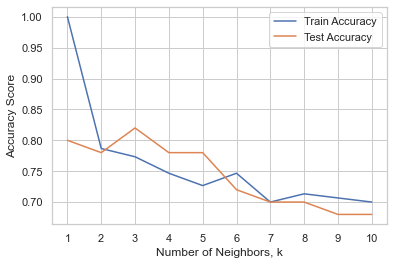

Train Accuracy           : [1.     0.7867 0.7733 0.7467 0.7267 0.7467 0.7    0.7133 0.7067 0.7   ]
Test Accuracy            : [0.8  0.78 0.82 0.78 0.78 0.72 0.7  0.7  0.68 0.68]


In [26]:
# Range of k
k_range = np.arange(1, 11)

train_accuracy_visualisation = np.empty(len(k_range))
test_accuracy_visualisation = np.empty(len(k_range))

for i,k in enumerate(k_range):
    # Changeable parameter 2: Distance metric
    knn_visualisation = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=1)
    
    # Fit the kNN model with train set
    knn_visualisation.fit(X_train_scaled, y_train)
    
    # Apply the trained kNN model on both train set and test set and append their accuracy scores into separate arrays
    train_accuracy_visualisation[i] = knn_visualisation.score(X_train_scaled, y_train)
    test_accuracy_visualisation[i] = knn_visualisation.score(X_test_scaled, y_test)

# Plot train accuracy and test accuracy to find the optimal value of k
plt.plot(k_range, train_accuracy_visualisation, label = 'Train Accuracy')
plt.plot(k_range, test_accuracy_visualisation, label = 'Test Accuracy')
plt.xticks(k_range)
plt.legend()

plt.xlabel('Number of Neighbors, k')
plt.ylabel('Accuracy Score')

plt.show()

# Print out each accuracy scores (to 4 decimal places)
np.set_printoptions(precision=4)
print("Train Accuracy           :", train_accuracy_visualisation)
print("Test Accuracy            :", test_accuracy_visualisation)

Model Performance Evaluation

In [27]:
model_performance("KNN Model Performance", y_test, y_pred_knn)

KNN Model Performance : 

              precision    recall  f1-score   support

           1       0.64      0.94      0.76        17
           2       0.86      0.67      0.75        18
           3       1.00      0.25      0.40         4
           5       1.00      0.67      0.80         3
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         6

    accuracy                           0.78        50
   macro avg       0.92      0.75      0.79        50
weighted avg       0.83      0.78      0.77        50



Confusion matrix:
[[16  1  0  0  0  0]
 [ 6 12  0  0  0  0]
 [ 3  0  1  0  0  0]
 [ 0  1  0  2  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  6]]


Cross Validation

In [28]:
# Define model evaluation method
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 42)

# Evaluate model
scores = cross_val_score(knn, X, y, scoring = 'accuracy', cv = cv, n_jobs = -1)

# Summarize result
print('Mean Accuracy: %.5f (%.5f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.70167 (0.09081)


ROC Curve

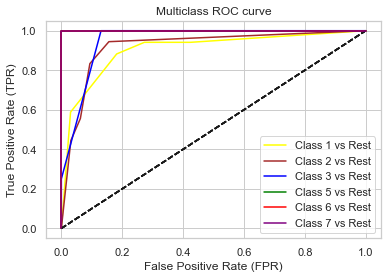

ROC AUC score = 0.963


In [29]:
# Obtain the probability of y_pred_knn
y_pred_knn_prob = knn.predict_proba(X_test_scaled)

# Find the paramters
for i in range(6):
    current_type = i + 1
    if current_type > 3:
        current_type = current_type + 1
        
    color = ['yellow', 'brown', 'blue', 'green', 'red', 'purple']    
    label = 'Class ' + str(current_type) + ' vs Rest'
    
    fpr, tpr, threshold = roc_curve(y_test, y_pred_knn_prob[:,i], pos_label = current_type )

    # Plot ROC-curve
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr,tpr, color = color[i], label = label)

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='best')
plt.show()

# Evaluation on training using ROC AUC  
nb_auc_overall = roc_auc_score(y_test, y_pred_knn_prob, multi_class = 'ovr')
print('ROC AUC score = %.3f' % nb_auc_overall)

**Decision Tree (Lim Wenn Chuaan)**

In [30]:
# Feature scaling
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

Import Decision Tree Classifier

In [31]:
from sklearn.tree import DecisionTreeClassifier

Hyperparameter Tuning

In [32]:
# Perform 5-fold cross validation to choose the best hyperparameters (maximum depth, maximum features, minimum sample leaf)
param = {"max_depth": np.arange(1,15),
         "max_features": np.arange(1,10),
         "min_samples_leaf": np.arange(1,10)}

tree = DecisionTreeClassifier(random_state=10)
tree_cv = GridSearchCV(tree, param, cv=5) 
tree_cv.fit(X_train_scaled, y_train)

print(tree_cv.best_params_)
print("Best mean cross validation score:", tree_cv.best_score_)

# Assign the parameters into a list
tree_best_param = list(tree_cv.best_params_.values())

{'max_depth': 4, 'max_features': 8, 'min_samples_leaf': 5}
Best mean cross validation score: 0.6866666666666668


Fit the Model and Use the Model to Make Predictions on Test Data

In [33]:
# Train a decision tree with the best 3 parameters above
tree = DecisionTreeClassifier(criterion="entropy", splitter='best', max_depth=tree_best_param[0], 
                              max_features=tree_best_param[1], min_samples_leaf=tree_best_param[2], random_state=10)

tree.fit(X_train_scaled, y_train)

y_train_pred_tree = tree.predict(X_train_scaled)
y_test_pred_tree = tree.predict(X_test_scaled)

print("Train Accuracy:", metrics.accuracy_score(y_train,y_train_pred_tree))
print("Test Accuracy:", metrics.accuracy_score(y_test,y_test_pred_tree))

Train Accuracy: 0.7733333333333333
Test Accuracy: 0.64


Model Performance Evaluation

In [34]:
model_performance("Decision Tree Model Performance", y_test, y_test_pred_tree)

Decision Tree Model Performance : 

              precision    recall  f1-score   support

           1       0.58      0.88      0.70        17
           2       0.64      0.39      0.48        18
           3       1.00      0.25      0.40         4
           5       0.75      1.00      0.86         3
           6       0.50      1.00      0.67         2
           7       1.00      0.67      0.80         6

    accuracy                           0.64        50
   macro avg       0.74      0.70      0.65        50
weighted avg       0.69      0.64      0.62        50



Confusion matrix:
[[15  2  0  0  0  0]
 [10  7  0  1  0  0]
 [ 1  2  1  0  0  0]
 [ 0  0  0  3  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  2  4]]


Cross Validation

In [35]:
# Define model evaluation method
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 42)

# Evaluate model
scores = cross_val_score(tree, X, y, scoring = 'accuracy', cv = cv, n_jobs = -1)

# Summarize result
print('Mean Accuracy: %.5f (%.5f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.71500 (0.08078)


ROC Curve

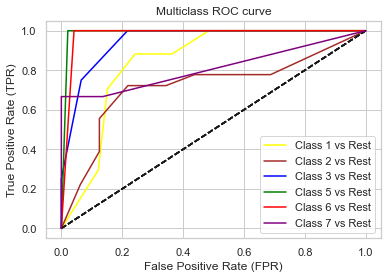

ROC AUC score = 0.881


In [36]:
# Obtain the probability of y_pred_knn
y_pred_tree_prob = tree.predict_proba(X_test_scaled)

# Find the paramters
for i in range(6):
    current_type = i + 1
    if current_type > 3:
        current_type = current_type + 1
        
    color = ['yellow', 'brown', 'blue', 'green', 'red', 'purple']    
    label = 'Class ' + str(current_type) + ' vs Rest'
    
    fpr, tpr, threshold = roc_curve(y_test, y_pred_tree_prob[:,i], pos_label = current_type )

    # Plot ROC-curve
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr,tpr, color = color[i], label = label)

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='best')
plt.show()

# Evaluation on training using ROC AUC  
nb_auc_overall = roc_auc_score(y_test, y_pred_tree_prob, multi_class = 'ovr')
print('ROC AUC score = %.3f' % nb_auc_overall)

**Logistic Regression (Ho Wan Gee)**

In [37]:
# Import library
from sklearn.linear_model import LogisticRegression

In [38]:
# Feature scaling
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [39]:
# L1 Lasso (feature selection)
# L2 Ridge (smoothing)

# Create Logistic Regression model without any hyperparameter tuning
logreg = LogisticRegression(multi_class = 'multinomial') # L2 penalty, C = 1.0, solver = lbfgs

# Fit the standard scaled data into model
logreg.fit(X_train_scaled, y_train)

# Predict for standard scaled testing data
y_pred = logreg.predict(X_test_scaled)

In [40]:
model_performance('Logistic Regression with default hyperparameter', y_test, y_pred)

Logistic Regression with default hyperparameter : 

              precision    recall  f1-score   support

           1       0.65      0.76      0.70        17
           2       0.65      0.61      0.63        18
           3       0.00      0.00      0.00         4
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         2
           7       0.86      1.00      0.92         6

    accuracy                           0.70        50
   macro avg       0.69      0.73      0.71        50
weighted avg       0.66      0.70      0.68        50



Confusion matrix:
[[13  4  0  0  0  0]
 [ 5 11  1  0  0  1]
 [ 2  2  0  0  0  0]
 [ 0  0  0  3  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  6]]


In [41]:
# Using GridSearchCV for hyperparameter tuning

grid_params = {'C': np.logspace(-3, 3, 7),
              'penalty': ['l1', 'l2'],
              'solver': ['liblinear','newton-cg','lbfgs', 'sag', 'saga']}

cv = RepeatedStratifiedKFold(n_splits = 4, n_repeats = 3, random_state = 42)
grid = GridSearchCV(LogisticRegression(multi_class = 'multinomial'), grid_params, cv = cv)

grid.fit(X_train_scaled, y_train)

print('Best hyperparameter from GridSearchCV:\n', grid.best_params_)
print('\nAccuracy score:\n', grid.best_score_)
print('\nStandard deviation of accuracy score:\n', grid.cv_results_['std_test_score'][grid.best_index_])

Best hyperparameter from GridSearchCV:
 {'C': 1.0, 'penalty': 'l2', 'solver': 'saga'}

Accuracy score:
 0.6246443812233285

Standard deviation of accuracy score:
 0.07035869040934421


In [42]:
# Create LogisticRegression model with tunned hyperparameter
lr_tunned = LogisticRegression(penalty = 'l2', C = 1, solver = 'saga', multi_class = 'multinomial')

# Fit training data into model
lr_tunned.fit(X_train_scaled, y_train)

# Predict for testing data
y_pred = lr_tunned.predict(X_test_scaled)

In [43]:
model_performance('Logistic Regression with tunned hyperparameter', y_test, y_pred)

Logistic Regression with tunned hyperparameter : 

              precision    recall  f1-score   support

           1       0.65      0.76      0.70        17
           2       0.65      0.61      0.63        18
           3       0.00      0.00      0.00         4
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         2
           7       0.86      1.00      0.92         6

    accuracy                           0.70        50
   macro avg       0.69      0.73      0.71        50
weighted avg       0.66      0.70      0.68        50



Confusion matrix:
[[13  4  0  0  0  0]
 [ 5 11  1  0  0  1]
 [ 2  2  0  0  0  0]
 [ 0  0  0  3  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  6]]


ROC-AUC curve

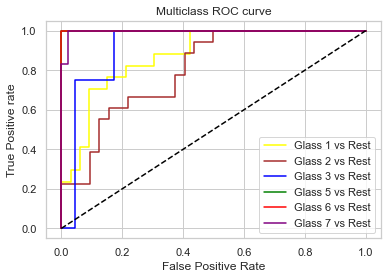

ROC AUC score (marco) = 0.933
ROC AUC score (weighted) = 0.880


In [44]:
# Predict output using probability
lr_pred_prob = lr_tunned.predict_proba(X_test_scaled)

color = ['yellow', 'brown', 'blue', 'green', 'red', 'purple']    

for i, k in enumerate(data['Type'].unique()):    
    fpr, tpr, thresh = roc_curve(y_test, lr_pred_prob[:,i], pos_label = k)
    label = 'Glass ' + str(k) + ' vs Rest'
    plt.plot(fpr, tpr, color = color[i], label = label)
    
# plotting 
plt.plot([0,1], [0,1], color = 'black', linestyle='--')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

plt.show()

roc_score_macro = roc_auc_score(y_test, lr_pred_prob, multi_class = 'ovr')
roc_score_weighted = roc_auc_score(y_test, lr_pred_prob, multi_class = 'ovr', average = 'weighted')
print('ROC AUC score (marco) = %.3f' % roc_score_macro)
print('ROC AUC score (weighted) = %.3f' % roc_score_weighted)

The recall and precision of glass type 3 is zero with logistic regression model<Br/>
Hence, we use oversampling method (SMOTE) to generate more samples for the minority class and try to improve the recall for glass type 3

In [45]:
# Create object for SMOTE
smote = SMOTE(sampling_strategy = 'auto', k_neighbors = 5, random_state = 42)

# Fit X_train_scaled and y_train for oversampling
X_oversamp, y_oversamp = smote.fit_resample(X_train_scaled, y_train)

In [46]:
# Use GridSearchCV to find the optimum hyperparameter for oversampling sample
grid_params = {'C': np.logspace(-3, 3, 7),
              'penalty': ['l1', 'l2'],
              'solver': ['liblinear','newton-cg','lbfgs', 'sag', 'saga']}

cv = RepeatedStratifiedKFold(n_splits = 4, n_repeats = 3, random_state = 42)
grid = GridSearchCV(LogisticRegression(multi_class = 'multinomial'), grid_params, cv = cv)

grid.fit(X_oversamp, y_oversamp)

print('Best hyperparameter from GridSearchCV:\n', grid.best_params_)
print('\nAccuracy score:\n', grid.best_score_)
print('\nStandard deviation of accuracy score:\n', grid.cv_results_['std_test_score'][grid.best_index_])

Best hyperparameter from GridSearchCV:
 {'C': 100.0, 'penalty': 'l2', 'solver': 'sag'}

Accuracy score:
 0.8405722573839663

Standard deviation of accuracy score:
 0.02650292511489965


In [47]:
lr_smote = LogisticRegression(penalty = 'l2', C = 100, solver = 'sag', multi_class = 'multinomial')

# Fit training data into model
lr_smote.fit(X_oversamp, y_oversamp)

# Predict for testing data
y_pred = lr_smote.predict(X_test_scaled)

In [48]:
model_performance('Logistic Regression with SMOTE', y_test, y_pred)

Logistic Regression with SMOTE : 

              precision    recall  f1-score   support

           1       0.71      0.71      0.71        17
           2       0.62      0.44      0.52        18
           3       0.50      0.75      0.60         4
           5       1.00      1.00      1.00         3
           6       0.67      1.00      0.80         2
           7       0.75      1.00      0.86         6

    accuracy                           0.68        50
   macro avg       0.71      0.82      0.75        50
weighted avg       0.68      0.68      0.67        50



Confusion matrix:
[[12  4  1  0  0  0]
 [ 5  8  2  0  1  2]
 [ 0  1  3  0  0  0]
 [ 0  0  0  3  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  6]]


ROC-AUC curve

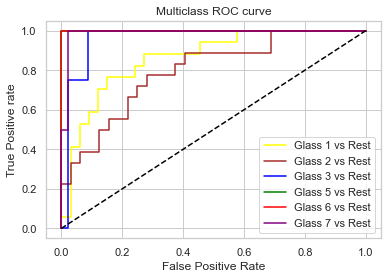

ROC AUC score (marco) = 0.935
ROC AUC score (weighted) = 0.876


In [49]:
# Predict output using probability
lr_pred_prob = lr_smote.predict_proba(X_test_scaled)

color = ['yellow', 'brown', 'blue', 'green', 'red', 'purple']    

for i, k in enumerate(data['Type'].unique()):    
    fpr, tpr, thresh = roc_curve(y_test, lr_pred_prob[:,i], pos_label = k)
    label = 'Glass ' + str(k) + ' vs Rest'
    plt.plot(fpr, tpr, color = color[i], label = label)
    
# plotting 
plt.plot([0,1], [0,1], color = 'black', linestyle='--')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

plt.show()

roc_score_macro = roc_auc_score(y_test, lr_pred_prob, multi_class = 'ovr')
roc_score_weighted = roc_auc_score(y_test, lr_pred_prob, multi_class = 'ovr', average = 'weighted')
print('ROC AUC score (marco) = %.3f' % roc_score_macro)
print('ROC AUC score (weighted) = %.3f' % roc_score_weighted)

After oversampling is done, the recall for Glass type 3 has improved. However, the accuracy decreased.

**Support Vector Machines (Ho Wan Gee)**

In [50]:
# Import library
from sklearn import svm

In [51]:
# Feature scaling
X_train_scaled = mms.fit_transform(X_train)
X_test_scaled = mms.transform(X_test)

In [52]:
# Create SVM model without any hyperparameter tuning
svm_model = svm.SVC(decision_function_shape='ovr') # c = 1, kernal = rbf, gamma = scaled

# Fit training data into model
svm_model.fit(X_train_scaled, y_train)

# Predict for testing data
y_pred = svm_model.predict(X_test_scaled)

In [53]:
model_performance('SVM with Default hyperparameter', y_test, y_pred)

SVM with Default hyperparameter : 

              precision    recall  f1-score   support

           1       0.62      0.76      0.68        17
           2       0.65      0.72      0.68        18
           3       0.00      0.00      0.00         4
           5       1.00      0.67      0.80         3
           6       1.00      0.50      0.67         2
           7       1.00      1.00      1.00         6

    accuracy                           0.70        50
   macro avg       0.71      0.61      0.64        50
weighted avg       0.66      0.70      0.67        50



Confusion matrix:
[[13  4  0  0  0  0]
 [ 5 13  0  0  0  0]
 [ 3  1  0  0  0  0]
 [ 0  1  0  2  0  0]
 [ 0  1  0  0  1  0]
 [ 0  0  0  0  0  6]]


In [54]:
# Use GridSearchCV for hyperparameter tunning
param_grid = {'C': np.logspace(-3,3,7),
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 'auto', 'scaled'],
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

cv = RepeatedStratifiedKFold(n_splits = 4, n_repeats = 3, random_state = 42)
grid = GridSearchCV(svm.SVC(decision_function_shape='ovr'), param_grid, cv = cv)

grid.fit(X_train_scaled, y_train)

print('Best hyperparameter from GridSearchCV:\n', grid.best_params_)
print('\nAccuracy score:\n', grid.best_score_)
print('\nStandard deviation of accuracy score:\n', grid.cv_results_['std_test_score'][grid.best_index_])

Best hyperparameter from GridSearchCV:
 {'C': 1000.0, 'gamma': 1, 'kernel': 'poly'}

Accuracy score:
 0.6884779516358464

Standard deviation of accuracy score:
 0.08914145808686923


In [55]:
svm_tunned = svm.SVC(C = 1000, kernel = 'poly', gamma = 1, decision_function_shape='ovr', probability = True)

# Fit training data into model
svm_tunned.fit(X_train_scaled, y_train)

# Predict for testing data
y_pred = svm_tunned.predict(X_test_scaled)

In [56]:
model_performance('SVM with tunned hyperparameter', y_test, y_pred)

SVM with tunned hyperparameter : 

              precision    recall  f1-score   support

           1       0.62      0.76      0.68        17
           2       0.80      0.67      0.73        18
           3       0.67      0.50      0.57         4
           5       1.00      1.00      1.00         3
           6       0.67      1.00      0.80         2
           7       1.00      0.83      0.91         6

    accuracy                           0.74        50
   macro avg       0.79      0.79      0.78        50
weighted avg       0.76      0.74      0.74        50



Confusion matrix:
[[13  3  1  0  0  0]
 [ 6 12  0  0  0  0]
 [ 2  0  2  0  0  0]
 [ 0  0  0  3  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  1  5]]


ROC-AUC curve

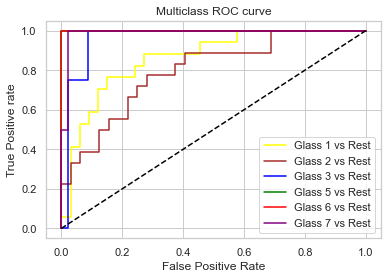

ROC AUC score (marco) = 0.938
ROC AUC score (weighted) = 0.905


In [57]:
# Predict output using probability
svm_pred_prob = svm_tunned.predict_proba(X_test_scaled)

color = ['yellow', 'brown', 'blue', 'green', 'red', 'purple']    

for i, k in enumerate(data['Type'].unique()):    
    fpr, tpr, thresh = roc_curve(y_test, lr_pred_prob[:,i], pos_label = k)
    label = 'Glass ' + str(k) + ' vs Rest'
    plt.plot(fpr, tpr, color = color[i], label = label)
    
# plotting 
plt.plot([0,1], [0,1], color = 'black', linestyle='--')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

plt.show()

roc_score_macro = roc_auc_score(y_test, svm_pred_prob, multi_class = 'ovr')
roc_score_weighted = roc_auc_score(y_test, svm_pred_prob, multi_class = 'ovr', average = 'weighted')
print('ROC AUC score (marco) = %.3f' % roc_score_macro)
print('ROC AUC score (weighted) = %.3f' % roc_score_weighted)

**Naive Bayes (Ong Kar Ming)**

Scale the features using standard scalar.

In [58]:
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

Oversampling

In [59]:
smote = SMOTE(sampling_strategy = 'auto', k_neighbors = 5, random_state = 42)
X_oversamp, y_oversamp = smote.fit_resample(X_train_scaled, y_train)

In [60]:
X_train_scaled = X_oversamp

Import Gaussian Naive Bayes

In [61]:
from sklearn.naive_bayes import GaussianNB

nbModel = GaussianNB()  # No parameter is tuned (using default parameter)

Fit the model with the scaled train data (X_train_scaled, y_train) and get the predicted values for X_test_scaled.

In [62]:
# Train model
nbModel.fit(X_train_scaled, y_oversamp)

# Test model
y_pred_nb = nbModel.predict(X_test_scaled)
y_pred_nb

array([3, 6, 2, 3, 1, 2, 2, 3, 3, 3, 7, 3, 7, 7, 6, 3, 2, 3, 3, 1, 1, 1,
       2, 1, 3, 3, 3, 2, 7, 1, 2, 7, 3, 3, 1, 3, 3, 3, 5, 2, 3, 2, 2, 1,
       3, 7, 5, 1, 5, 5], dtype=int64)

Original y_test values to be compared.

In [63]:
y_test.values

array([1, 6, 2, 2, 1, 1, 2, 1, 1, 3, 7, 3, 7, 7, 6, 1, 2, 1, 1, 1, 1, 2,
       2, 1, 2, 1, 3, 1, 7, 2, 2, 7, 3, 2, 1, 2, 1, 2, 5, 2, 1, 2, 2, 2,
       2, 7, 5, 1, 2, 5], dtype=int64)

Performance Evaluation

In [64]:
model_performance("Performance for Gaussian Naive Bayes Classifier", y_test, y_pred_nb)

Performance for Gaussian Naive Bayes Classifier : 

              precision    recall  f1-score   support

           1       0.67      0.35      0.46        17
           2       0.80      0.44      0.57        18
           3       0.21      1.00      0.35         4
           5       0.75      1.00      0.86         3
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         6

    accuracy                           0.58        50
   macro avg       0.74      0.80      0.71        50
weighted avg       0.74      0.58      0.60        50



Confusion matrix:
[[6 2 9 0 0 0]
 [3 8 6 1 0 0]
 [0 0 4 0 0 0]
 [0 0 0 3 0 0]
 [0 0 0 0 2 0]
 [0 0 0 0 0 6]]


As we can see from above that accuracy we obtain here is considered as acceptable.

*Cross Validation*

In [65]:
# Define model evaluation method
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 42)

# Evaluate model
scores = cross_val_score(nbModel, X_train_scaled, y_oversamp, scoring = 'accuracy', cv = cv, n_jobs = -1)

# Summarize result
print('Mean Accuracy: %.5f (%.5f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.70743 (0.05186)


By repeating three times, we obtain an fairly low accuracy using 10-fold.

*ROC Curve*

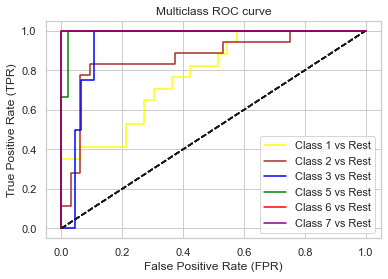

Overall ROC AUC score = 0.929


In [66]:
# Obtain the probability of y_pred_nb
y_pred_nb_prob = nbModel.predict_proba(X_test_scaled)

# Find the paramters

for i in range(6):
    current_type = i + 1
    if current_type > 3:
        current_type = current_type + 1
        
    color = ['yellow', 'brown', 'blue', 'green', 'red', 'purple']    
    label = 'Class ' + str(current_type) + ' vs Rest'
    
    fpr, tpr, threshold = roc_curve(y_test, y_pred_nb_prob[:,i], pos_label = current_type )

    # Plot ROC-curve
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr,tpr, color = color[i], label = label)

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='best')
plt.show()

# Evaluation on training using ROC AUC  
nb_auc_overall = roc_auc_score(y_test, y_pred_nb_prob, multi_class = 'ovr') # try for both ovo and ovr
print('Overall ROC AUC score = %.3f' % nb_auc_overall)

By look at the graph, we can see that the model is good at correctly recognizing class 5,6,7 as class 5,6,7 respectively.

Overall, the model has pretty good ability of recognizing each class correctly as the ROC AUC score is high.

*Hyperparameter Tuning*

In [67]:
# Will be used later to see the time used for GridSearchCV
t0 = time()

# Parameters
param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}

# GridSearchCV method
cv = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 3, random_state = 42)
search = GridSearchCV(nbModel, param_grid, scoring = 'accuracy', cv = cv)
results = search.fit(X_train_scaled, y_oversamp)

print('Mean Accuracy: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

# Test time of GridSearchCV
test_time = time() - t0
print("GridSearchCV Test Time: %.3fs" % test_time)

Mean Accuracy: 0.722
Config: {'var_smoothing': 0.12328467394420659}
GridSearchCV Test Time: 8.383s


One thing to note that, here we are set the range of alpha to be [1.0e-10, 1] and not any value higher. This is because using higher alpha values will push the likelihood towards a value of 0.5, i.e., the probability of a word equal to 0.5 for both the positive and negative reviews. Since we are not getting much information from that, it is not preferable.

Here, we will adapt the result of GridSearchCV for the value of alpha in Laplace Smoothing.

In [68]:
nbModel_tuned = GaussianNB(var_smoothing = 0.1233)

In [69]:
nbModel_tuned.fit(X_train_scaled, y_oversamp)

y_pred_nb_tuned = nbModel_tuned.predict(X_test_scaled)
print("Predicted:", y_pred_nb_tuned, "\n")

print("Actual:", y_test.values)

Predicted: [3 6 2 3 3 3 3 3 1 3 7 3 7 7 6 6 3 3 1 1 1 3 1 1 3 3 3 3 7 1 2 7 3 3 1 1 1
 2 5 3 1 3 2 3 3 7 5 3 2 5] 

Actual: [1 6 2 2 1 1 2 1 1 3 7 3 7 7 6 1 2 1 1 1 1 2 2 1 2 1 3 1 7 2 2 7 3 2 1 2 1
 2 5 2 1 2 2 2 2 7 5 1 2 5]


In [70]:
model_performance("Performance for (Tuned) Gaussian Naive Bayes Classifier", y_test, y_pred_nb_tuned)

Performance for (Tuned) Gaussian Naive Bayes Classifier : 

              precision    recall  f1-score   support

           1       0.73      0.47      0.57        17
           2       1.00      0.28      0.43        18
           3       0.18      1.00      0.31         4
           5       1.00      1.00      1.00         3
           6       0.67      1.00      0.80         2
           7       1.00      1.00      1.00         6

    accuracy                           0.56        50
   macro avg       0.76      0.79      0.69        50
weighted avg       0.83      0.56      0.59        50



Confusion matrix:
[[ 8  0  8  0  1  0]
 [ 3  5 10  0  0  0]
 [ 0  0  4  0  0  0]
 [ 0  0  0  3  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  6]]


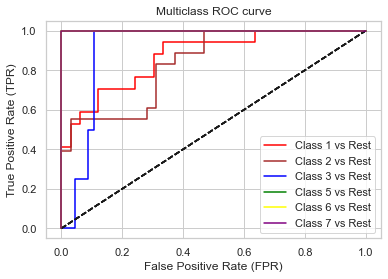

ROC AUC score = 0.937


In [71]:
## ROC-curve

# Obtain the probability of y_pred_nb
y_pred_nb_tuned_prob = nbModel_tuned.predict_proba(X_test_scaled)

# Find the paramters

for i in range(6):
    current_type = i + 1
    if current_type > 3:
        current_type = current_type + 1
        
    color = ['red', 'brown', 'blue', 'green', 'yellow', 'purple']    
    label = 'Class ' + str(current_type) + ' vs Rest'
    
    fpr, tpr, threshold = roc_curve(y_test, y_pred_nb_tuned_prob[:,i], pos_label = current_type)

    # Plot ROC-curve
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr,tpr, color = color[i], label = label)

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='best')
plt.show()

# Evaluation on training using ROC AUC  
nb_auc_overall = roc_auc_score(y_test, y_pred_nb_tuned_prob, multi_class = 'ovr')
print('ROC AUC score = %.3f' % nb_auc_overall)

**Linear Discriminant Analysis (Ong Kar Ming)**

Scale the features using standard scalar.

In [72]:
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

Oversampling

In [73]:
smote = SMOTE(sampling_strategy = 'auto', k_neighbors = 5, random_state = 42)
X_oversamp, y_oversamp = smote.fit_resample(X_train_scaled, y_train)

In [74]:
X_train_scaled = X_oversamp

Import Linear Discriminant Analysis (LDA)

In [75]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

LDAmodel = LinearDiscriminantAnalysis()

Fit the model with the scaled train data (X_train_scaled, y_train) and get the predicted values for X_test_scaled.

In [76]:
# Train Model
LDAmodel.fit(X_train_scaled, y_oversamp)

# Test model
y_pred_LDA = LDAmodel.predict(X_test_scaled)
y_pred_LDA

array([1, 6, 2, 2, 1, 1, 3, 2, 1, 2, 7, 3, 7, 6, 6, 3, 3, 1, 1, 1, 1, 1,
       2, 1, 2, 1, 3, 2, 7, 1, 2, 7, 3, 2, 1, 2, 1, 2, 5, 3, 1, 2, 2, 1,
       2, 7, 5, 1, 2, 5], dtype=int64)

Original y_test values to be compared.

In [77]:
y_test.values

array([1, 6, 2, 2, 1, 1, 2, 1, 1, 3, 7, 3, 7, 7, 6, 1, 2, 1, 1, 1, 1, 2,
       2, 1, 2, 1, 3, 1, 7, 2, 2, 7, 3, 2, 1, 2, 1, 2, 5, 2, 1, 2, 2, 2,
       2, 7, 5, 1, 2, 5], dtype=int64)

Performance Evaluation

In [78]:
model_performance("Performance for LDA Classifier", y_test, y_pred_LDA)

Performance for LDA Classifier : 

              precision    recall  f1-score   support

           1       0.82      0.82      0.82        17
           2       0.80      0.67      0.73        18
           3       0.43      0.75      0.55         4
           5       1.00      1.00      1.00         3
           6       0.67      1.00      0.80         2
           7       1.00      0.83      0.91         6

    accuracy                           0.78        50
   macro avg       0.79      0.85      0.80        50
weighted avg       0.81      0.78      0.79        50



Confusion matrix:
[[14  2  1  0  0  0]
 [ 3 12  3  0  0  0]
 [ 0  1  3  0  0  0]
 [ 0  0  0  3  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  1  5]]


As we can see from above that accuracy we obtain here is fairly high.

*Cross Validation*

In [79]:
# Define model evaluation method
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 42)

# Evaluate model
scores = cross_val_score(LDAmodel, X_train_scaled, y_oversamp, scoring = 'accuracy', cv = cv, n_jobs = -1)

# Summarize result
print('Mean Accuracy: %.5f (%.5f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.76727 (0.06191)


By repeating three times, we obtain an fairly good accuracy using 10-fold.

*ROC Curve*

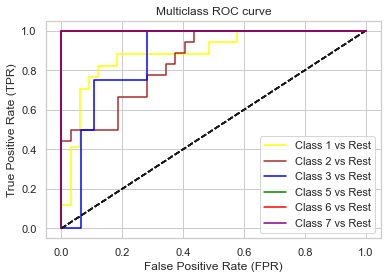

Overall ROC AUC score = 0.934


In [80]:
# Obtain the probability of y_pred_nb
y_pred_LDA_prob = LDAmodel.predict_proba(X_test_scaled)

# Find the paramters

for i in range(6):
    current_type = i + 1
    if current_type > 3:
        current_type = current_type + 1
        
    color = ['yellow', 'brown', 'blue', 'green', 'red', 'purple']    
    label = 'Class ' + str(current_type) + ' vs Rest'
    
    fpr, tpr, threshold = roc_curve(y_test, y_pred_LDA_prob[:,i], pos_label = current_type )

    # Plot ROC-curve
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr,tpr, color = color[i], label = label)

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='best')
plt.show()

# Evaluation on training using ROC AUC  
LDA_auc_overall = roc_auc_score(y_test, y_pred_LDA_prob, multi_class = 'ovr') # try for both ovo and ovr
print('Overall ROC AUC score = %.3f' % LDA_auc_overall)

By look at the graph, we can see that the model can perfectly recognizing class 5,6,7 as class 5,6,7 respectively.

Overall, the model has pretty good ability of recognizing each class correctly as the overall ROC AUC score is high.

*Hyperparameter Tuning*

In [81]:
# Will be used later to see the time used for GridSearchCV
t0 = time()

# Parameters
param_grid = {'solver': ['svd', 'lsqr', 'eigen'], "tol" : [0.0001,0.0002,0.0003]}

# GridSearchCV method
cv = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 3, random_state = 42)
search = GridSearchCV(LDAmodel, param_grid, scoring = 'accuracy', cv = cv)
results = search.fit(X_train_scaled, y_oversamp)

print('Mean Accuracy: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

# Test time of GridSearchCV
test_time = time() - t0
print("GridSearchCV Test Time: %.3fs" % test_time)

Mean Accuracy: 0.776
Config: {'solver': 'svd', 'tol': 0.0001}
GridSearchCV Test Time: 0.923s


The best hyperparamter to be used (suggested by GridSearchCV) is 'svd' and '0.0001', which is a default value. Therefore, there is no need to modify the hyperparameters in LDAmodel.

**Random Forest (Joyce Kueh Suk Ting)**

In [82]:
# Import libraries
from sklearn.ensemble import RandomForestClassifier

In [83]:
# Feature scaling
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

smote = SMOTE(sampling_strategy = 'auto', k_neighbors = 5, random_state = 42)
X_oversamp, y_oversamp = smote.fit_resample(X_train_scaled, y_train)

In [113]:
t0 = time()
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


rf_clf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf_clf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_oversamp, y_oversamp)

test_time = time() - t0
print('\nRandomziedSearchCV Test Time\t: %.3fs' % test_time)

Fitting 5 folds for each of 100 candidates, totalling 500 fits

RandomziedSearchCV Test Time	: 440.600s


In [85]:
y_pred = rf_random.predict(X_test_scaled)
target_names = ['1', '2','3','5','6','7']
print("Random Forest Model")
print(classification_report(y_test, y_pred, target_names=target_names))

Random Forest Model
              precision    recall  f1-score   support

           1       0.82      0.82      0.82        17
           2       0.93      0.78      0.85        18
           3       0.50      0.75      0.60         4
           5       0.75      1.00      0.86         3
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         6

    accuracy                           0.84        50
   macro avg       0.83      0.89      0.85        50
weighted avg       0.86      0.84      0.84        50



In [86]:
rf_clf = RandomForestClassifier(random_state=42,n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features='auto', max_depth=50, bootstrap=False)
rf_clf.fit(X_oversamp, y_oversamp)
print('Accuracy on training set:',rf_clf.score(X_oversamp, y_oversamp))
print('Accuracy on test set:',rf_clf.score(X_test_scaled,y_test))
print(rf_random.best_params_)

Accuracy on training set: 1.0
Accuracy on test set: 0.84
{'n_estimators': 800, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 90, 'bootstrap': False}


In [87]:
print(cross_val_score(rf_clf, X, y, cv=5))
accuracies = cross_val_score(rf_clf, X_oversamp, y_oversamp, cv = 5)

f1_score_rfc = metrics.f1_score(y_test,y_pred, average='micro')
print(f'Random Forest F1 Score: {f1_score_rfc*100:.2f}')
print(f'Accuracy (mean):{accuracies.mean()*100:}')
print(f'std: % {accuracies.std()*100:.2f}')

[0.725 0.775 0.75  0.625 0.775]
Random Forest F1 Score: 84.00
Accuracy (mean):89.66765873015873
std: % 6.94


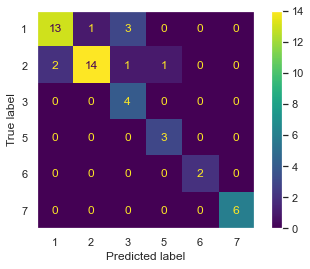

In [88]:
# Confusion Matrix
sns.set_style("dark")
plot_confusion_matrix(rf_clf, X_test_scaled, y_test)

ROC AUC score = 0.973


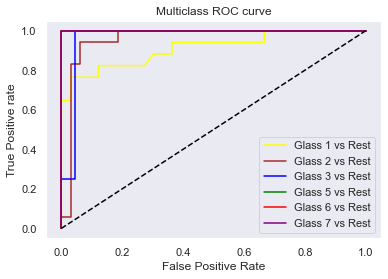

In [89]:
pred_prob = rf_clf.predict_proba(X_test_scaled)

color = ['yellow', 'brown', 'blue', 'green', 'red', 'purple']    

for i, k in enumerate(data['Type'].unique()):    
    fpr, tpr, thresh = roc_curve(y_test, pred_prob[:,i], pos_label = k)
    label = 'Glass ' + str(k) + ' vs Rest'
    plt.plot(fpr, tpr, color = color[i], label = label)
    
# plotting 
plt.plot([0,1], [0,1], color = 'black', linestyle='--')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
roc_score = roc_auc_score(y_test, pred_prob, multi_class = 'ovr')
print('ROC AUC score = %.3f' % roc_score)

**Stochastic Gradient Descent (Joyce Kueh Suk Ting)**

In [90]:
# Import library
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier

In [91]:
# Feature scaling
X_train_scaled = mms.fit_transform(X_train)
X_test_scaled = mms.transform(X_test)

In [92]:
# Use GridSearchCV to identify the best hyperparameter

max_iter = [max(np.ceil(10**6 / len(X)), 1000)]
small_alphas = [10.0e-08, 10.0e-09, 10.0e-10]
alphas = [10.0e-04, 10.0e-05, 10.0e-06, 10.0e-07]
l1_ratios = [0.075, 0.15, 0.30]
param_grid = [
            {'alpha': alphas, 'penalty': ['l1', 'l2'], 'average':[False]},
            {'alpha': alphas, 'penalty': ['elasticnet'], 'average':[False],
            'l1_ratio': l1_ratios},
            {'alpha': small_alphas, 'penalty': ['l1', 'l2'], 'average':[True]},
            {'alpha': small_alphas, 'penalty': ['elasticnet'], 'average':[True],
            'l1_ratio': l1_ratios}
            ]

init_est = linear_model.SGDClassifier()
grid_search = GridSearchCV(estimator=init_est,param_grid=param_grid, verbose=2, n_jobs=-1, cv=5)
grid_search.fit(X_train_scaled, y_train)
y_pred = grid_search.predict(X_test_scaled)
print(grid_search.best_params_)

Fitting 5 folds for each of 35 candidates, totalling 175 fits
{'alpha': 1e-08, 'average': True, 'penalty': 'l2'}


Accuracy on training set: 0.52
Accuracy on test set: 0.56
Stochastic Gradient Descent
              precision    recall  f1-score   support

           1       0.74      0.82      0.78        17
           2       0.67      0.78      0.72        18
           3       0.00      0.00      0.00         4
           5       1.00      1.00      1.00         3
           6       1.00      0.50      0.67         2
           7       1.00      1.00      1.00         6

    accuracy                           0.76        50
   macro avg       0.73      0.68      0.69        50
weighted avg       0.71      0.76      0.73        50

[0.05  0.175 0.5   0.4   0.125]
Stochastic Gradient Desecent F1 Score: 76.00
Accuracy (mean):49.33333333333333
std: % 10.83


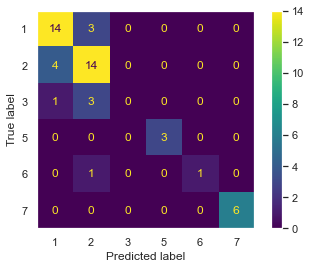

In [93]:
sgd_clf=SGDClassifier(max_iter=5000, random_state=42)
sgd_clf.fit(X_train_scaled, y_train)
print('Accuracy on training set:',sgd_clf.score(X_train_scaled, y_train))
print('Accuracy on test set:',sgd_clf.score(X_test_scaled,y_test))

plot_confusion_matrix(grid_search, X_test_scaled, y_test)

print("Stochastic Gradient Descent")
print(classification_report(y_test, y_pred, target_names=target_names)) 

print(cross_val_score(sgd_clf, X, y, cv=5))
accuracies = cross_val_score(sgd_clf, X_train_scaled, y_train, cv = 5)

f1_score_sgd = metrics.f1_score(y_test,y_pred, average='micro')
print(f'Stochastic Gradient Desecent F1 Score: {f1_score_sgd*100:.2f}')
print(f'Accuracy (mean):{accuracies.mean()*100:}')
print(f'std: % {accuracies.std()*100:.2f}')

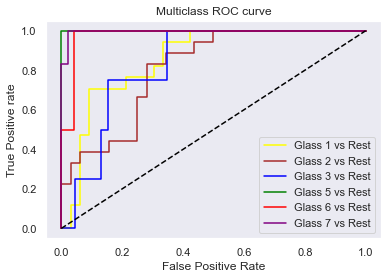

In [94]:
sgd_pred_prob = sgd_clf.decision_function(X_test_scaled)

color = ['yellow', 'brown', 'blue', 'green', 'red', 'purple']    

for i, k in enumerate(data['Type'].unique()):    
    fpr, tpr, thresh = roc_curve(y_test, sgd_pred_prob[:,i], pos_label = k)
    label = 'Glass ' + str(k) + ' vs Rest'
    plt.plot(fpr, tpr, color = color[i], label = label)
    
# plotting 
plt.plot([0,1], [0,1], color = 'black', linestyle='--')


plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

## Association Rule Mining

In [95]:
# Import libraries
from mlxtend.frequent_patterns import apriori, association_rules

### Data Understanding

In [96]:
data = pd.read_excel("dataset/paragraph.xlsx")

In [97]:
data.head()

,Description
0,Love isn't always a ray of sunshine.
1,That's what the older girls kept telling her w...
2,She had thought this was simply bitter talk on...
3,But now she had to face the fact that they may...
4,Love may not always be a ray of sunshine.


In [98]:
data.head().values

array([["Love isn't always a ray of sunshine."],
       ["That's what the older girls kept telling her when she said she had found the perfect man."],
       ['She had thought this was simply bitter talk on their part since they had been unable to find true love like hers.'],
       ['But now she had to face the fact that they may have been right.'],
       ['Love may not always be a ray of sunshine.']], dtype=object)

In [99]:
data.shape

(30, 1)

In [100]:
data.isnull().values.any()

False

### Data Preprocessing

In [101]:
# Processing the database

dataString = []

for i in range(len(data)):
    temp = ''.join(data.values[i]) # Convert to string
    temp = temp.lower() # Lowercase everything
    new_temp = temp.replace(".", "") # Remove "."
    final_temp = new_temp.replace("'", "") # Remove "'"

    dataString.append(final_temp)

dataString[0]

'love isnt always a ray of sunshine'

#### One Hot Encoding Function

In [102]:
def hot_encode(x):
    if(x <= 0):
        return 0
    if(x >= 1):
        return 1

#### Count Words Function

In [103]:
def count_words(x):
    d = {}
    words = x.split()
    
    for i in words:
        if i in d: 
            d[i] += 1 
        else:
            d[i] = 1
        
    return d

#### ARM (Ong Kar Ming)

In [104]:
# Create list to store dictionary of word count
sentenceList = []

In [105]:
for sentence in dataString:
    splited = count_words(sentence)
    sentenceList.append(splited)

In [106]:
# Cross check with first sentences
sentenceList[0]

{'love': 1, 'isnt': 1, 'always': 1, 'a': 1, 'ray': 1, 'of': 1, 'sunshine': 1}

In [107]:
# Create data frame for sentenceList
df = pd.DataFrame(sentenceList)
df.head()

,love,isnt,always,a,ray,of,sunshine,thats,what,the,...,ran,foot,im,meant,writing,moment,i,mean,"is,",else
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [108]:
# Fill NaN with 0
df_fill = df.fillna(0)

In [109]:
# data frame encoded 
df_encoded = df_fill.applymap(hot_encode)
df_encoded.head()

,love,isnt,always,a,ray,of,sunshine,thats,what,the,...,ran,foot,im,meant,writing,moment,i,mean,"is,",else
0,1,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [110]:
# Building model

frq_items = apriori(df_encoded, min_support = 0.1, use_colnames = True)

rules = association_rules(frq_items, metric ="lift", min_threshold = 1)

In [111]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(a),(always),0.266667,0.100000,0.100000,0.375,3.750000,0.073333,1.440000
1,(always),(a),0.100000,0.266667,0.100000,1.000,3.750000,0.073333,inf
2,(a),(of),0.266667,0.266667,0.166667,0.625,2.343750,0.095556,1.955556
3,(of),(a),0.266667,0.266667,0.166667,0.625,2.343750,0.095556,1.955556
4,(a),(the),0.266667,0.633333,0.200000,0.750,1.184211,0.031111,1.466667


In [112]:
rules[(rules['lift'] >= 6) & (rules['confidence'] >= 0.6)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
114,(wasnt),(it),0.100000,0.166667,0.1,1.0,6.0,0.083333,inf
115,(it),(wasnt),0.166667,0.100000,0.1,0.6,6.0,0.083333,2.25
268,"(had, he)",(remember),0.100000,0.100000,0.1,1.0,10.0,0.090000,inf
273,(remember),"(had, he)",0.100000,0.100000,0.1,1.0,10.0,0.090000,inf


It seems that the word "it" and "wasnt" always appear together in a sentence, while "he", "had", and "remember" frequently appear together in a sentence, which in a manner that is higher than the overall probability would suggest.